### Load Training data

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import pickle
import os
# Set figure width to 12 and height to 9
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size
output_folder = '/home/stephane/Playground/PycharmProjects/machine-learning/Classification/DataPrep/output/train/'

In [30]:
files_mappings_df = pd.read_hdf(path_or_buf=os.path.join(output_folder, 'files_mappings_df.hd5'), key='files_mappings')
files_mappings_df.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media,0
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,5
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8


In [31]:
files_mappings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, JT03336861 to JT03374028
Columns: 2244 entries, development aid to 0
dtypes: int8(2244)
memory usage: 1.7+ MB


In [43]:
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier

X, y = files_mappings_df.loc[:, 'development aid':'social media'], files_mappings_df.iloc[:, 2243:2244]

In [33]:
X.shape

(802, 2243)

In [42]:
X.head()

,development aid,international co-operation,aid coordination,aid institutions,development agencies,needs assessment,terms of aid,foreign aid,international organisations,regional co-operation,...,foreign corporations,authority,appeal,award of contract,judgements,dispositions,parties,regulatory co-operation,trade costs,social media
JT03336861,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03375495,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03376187,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
JT03328827,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
JT03319247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
np.ravel(y)

array([18,  5,  5, 20,  8, 27, 24, 13, 18,  3, 18,  5, 10, 13, 21,  7, 13,
        3, 10, 13, 15, 14, 16,  3, 26, 29, 27, 23, 21, 21, 27, 17, 16, 10,
       29, 10, 29,  4,  3, 13, 18, 16, 18, 12,  9, 27, 17, 16, 18, 27, 25,
        6, 10, 14, 13, 26, 27, 27,  3,  3,  6, 26,  2, 17,  1,  8,  1,  4,
        4, 21, 21, 18, 27,  9, 27, 23, 22, 28, 29,  8,  5, 27, 16, 18, 29,
        5,  1,  1, 18, 18,  9, 16, 18, 16,  4,  8, 15, 19,  3, 16, 19, 19,
       18,  3,  3, 16, 29, 25,  8, 20, 18,  6, 20,  3, 12,  5,  5,  3, 18,
        4, 29,  2,  4, 21, 25, 11, 17, 10, 21, 13, 21, 25, 10, 27, 14, 22,
        3, 28,  6, 27, 16,  1,  3, 16, 27, 16, 11, 29,  1, 21,  5,  5, 27,
       21, 18,  1, 11,  5, 27, 28, 13,  6, 29,  5, 15, 27, 13, 23, 21,  5,
       18, 15, 17,  9,  1, 16, 19,  3, 15, 24,  4,  2, 19,  8,  5, 25, 14,
       26, 26,  1, 21, 18, 27,  5, 13, 11, 27, 18, 22, 29, 18,  8, 16, 14,
       12, 18, 19, 29, 27,  1,  4, 20, 26,  5, 17, 24, 22,  9, 18, 24, 15,
        3,  5, 16, 18, 21

In [68]:
predicted = OneVsRestClassifier(LinearSVC(random_state=0)).fit(X,np.ravel(y)).predict(X)

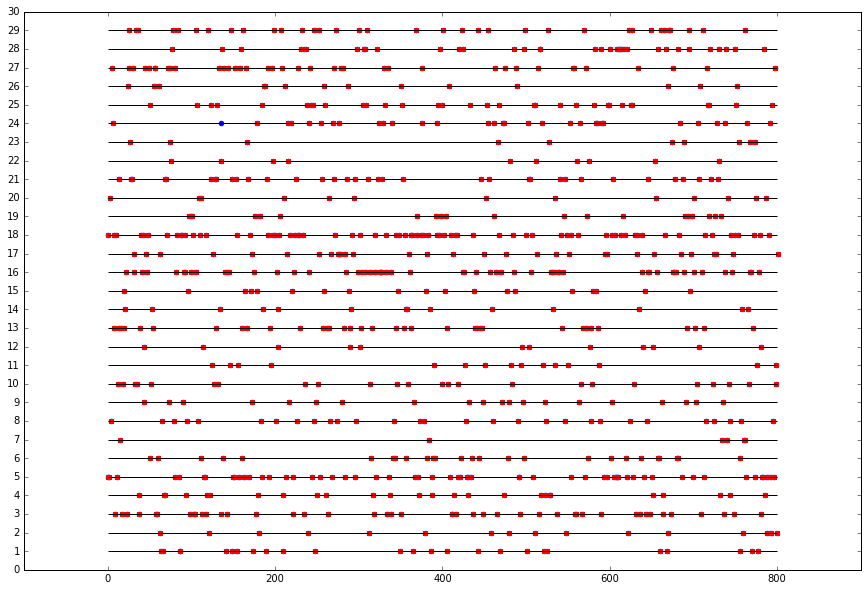

In [77]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(0, 30)
ax.hlines(np.arange(0,31), 0, 800)
plt.yticks(np.arange(0,31))
plt.scatter(np.arange(0,len(predicted)), predicted[:], marker='o', color='blue')
plt.scatter(np.arange(0,len(y)), y[:], marker='s', color='red')
plt.show()